# Author : Muhammad Abubakar kaleem

# Task # 3

# (1)Perform ‘Exploratory Data Analysis’ on dataset ‘Retail(Dataset).csv’

# (2)As a business manager, try to find out the weak areas where you can work    to make more profit.

# (3)What all business problems you can derive by exploring the data?

In [45]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [46]:
data= pd.read_csv('SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [47]:
data.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [48]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


<Figure size 1080x648 with 0 Axes>

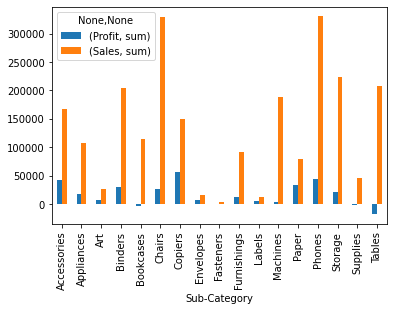

In [49]:
plt.figure(figsize= (15,9))
data.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.show()

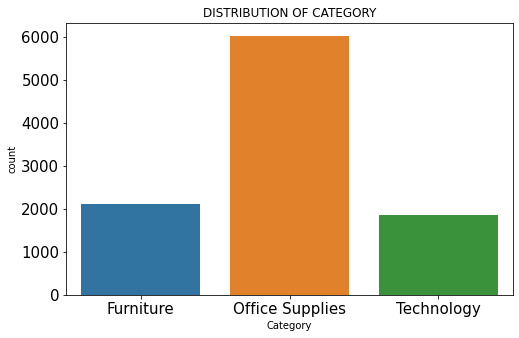

In [50]:
plt.figure(figsize=(8,5))
plt.title('DISTRIBUTION OF CATEGORY')
sns.countplot(x='Category', data = data)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

# DISTRIBUTION BASED ON REGION/CATEGORY

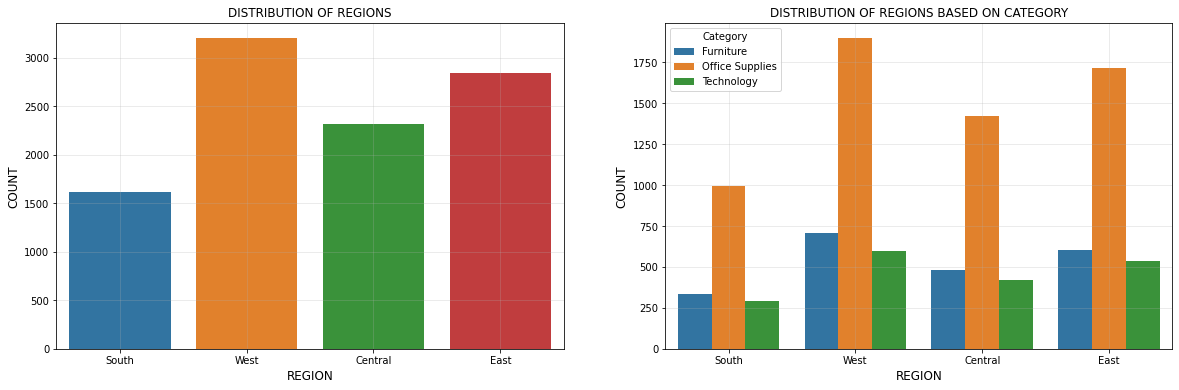

In [51]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.countplot('Region',data=data)
plt.title('DISTRIBUTION OF REGIONS')
plt.xlabel('REGION',fontsize=12)
plt.ylabel('COUNT',fontsize=12)
plt.grid(alpha=0.3)

plt.subplot(1,2,2)
sns.countplot('Region',hue='Category',data=data)
plt.title('DISTRIBUTION OF REGIONS BASED ON CATEGORY')
plt.ylabel('COUNT',fontsize=12)
plt.xlabel('REGION',fontsize=12)
plt.grid(alpha=0.3)
plt.show()

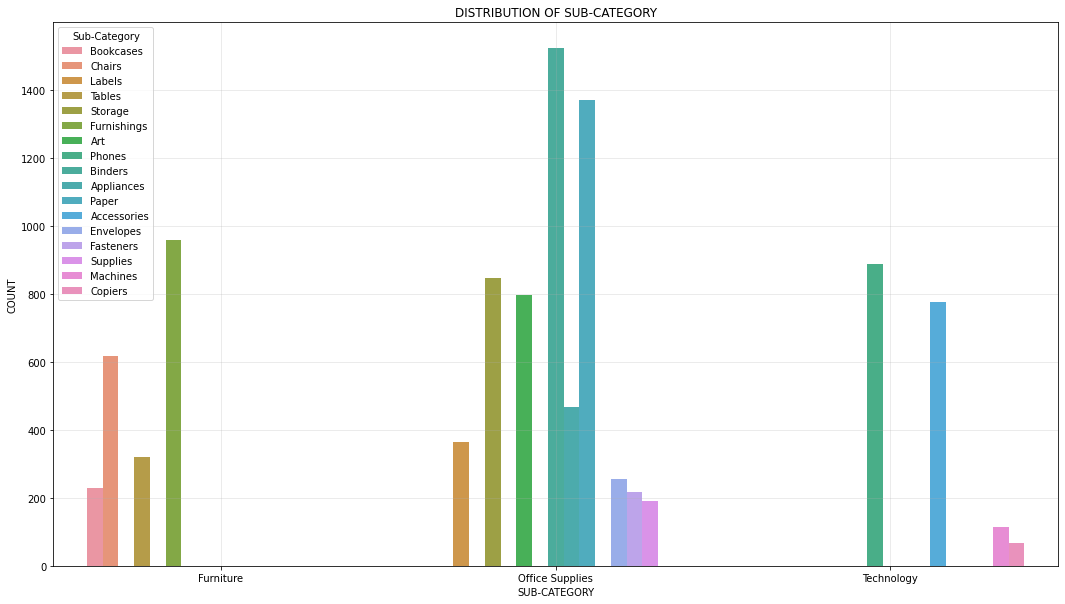

In [52]:
plt.figure(figsize=(18,10))
sns.countplot('Category',hue='Sub-Category',data=data);
plt.title('DISTRIBUTION OF SUB-CATEGORY')
plt.xlabel('SUB-CATEGORY')
plt.ylabel('COUNT')
plt.grid(alpha=0.3)
plt.show()

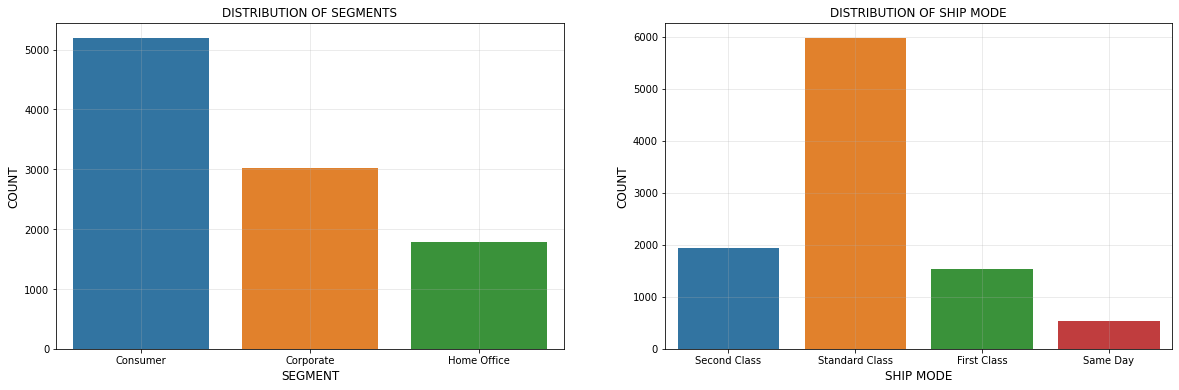

In [53]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.countplot('Segment',data=data)
plt.title('DISTRIBUTION OF SEGMENTS')
plt.xlabel('SEGMENT',fontsize=12)
plt.ylabel('COUNT',fontsize=12)
plt.grid(alpha=0.3)

plt.subplot(1,2,2)
sns.countplot('Ship Mode',data=data)
plt.title('DISTRIBUTION OF SHIP MODE')
plt.ylabel('COUNT',fontsize=12)
plt.xlabel('SHIP MODE',fontsize=12)
plt.grid(alpha=0.3)
plt.show()

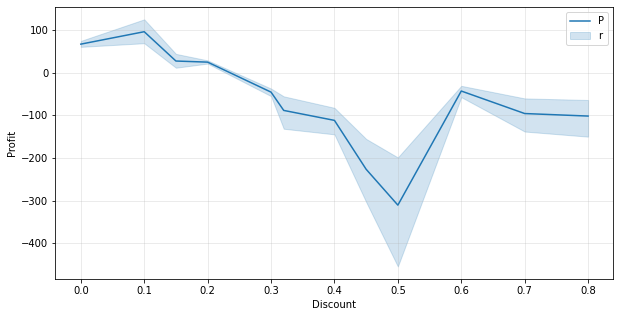

In [54]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Discount',y='Profit',data=data)
plt.legend('Profit')
plt.grid(alpha=0.3)

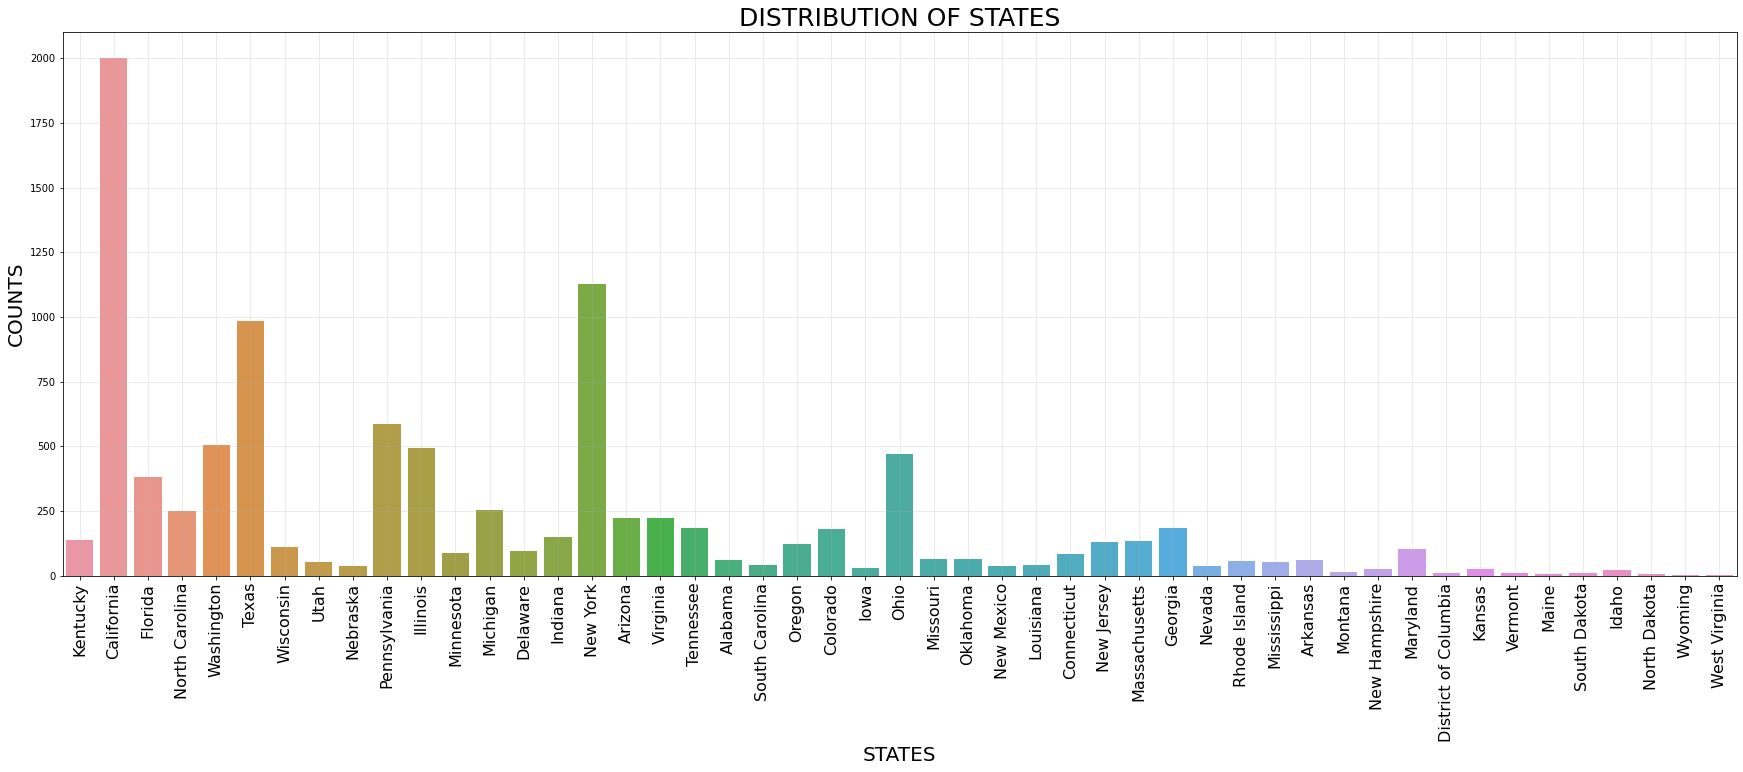

In [55]:
plt.figure(figsize=(30,10))
sns.countplot(data['State'])
plt.xticks(fontsize=16,rotation=90)
plt.ylabel('COUNTS',fontsize=20)
plt.xlabel('STATES',fontsize=20)
plt.title('DISTRIBUTION OF STATES',fontsize=25);
plt.grid(alpha=0.3)
plt.show()

# Ship Mode wise sales, profit, discount

In [65]:
df_region = data.groupby(['Region'])[['Sales', 'Discount', 'Profit']].mean()
df_region

,Sales,Discount,Profit
Region,,,
Central,215.772661,0.240353,17.092709
East,238.336110,0.145365,32.135808
South,241.803645,0.147253,28.857673
West,226.493233,0.109335,33.849032


C:\Users\Home\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


array([<AxesSubplot:ylabel='Sales'>, <AxesSubplot:ylabel='Discount'>,
       <AxesSubplot:ylabel='Profit'>], dtype=object)

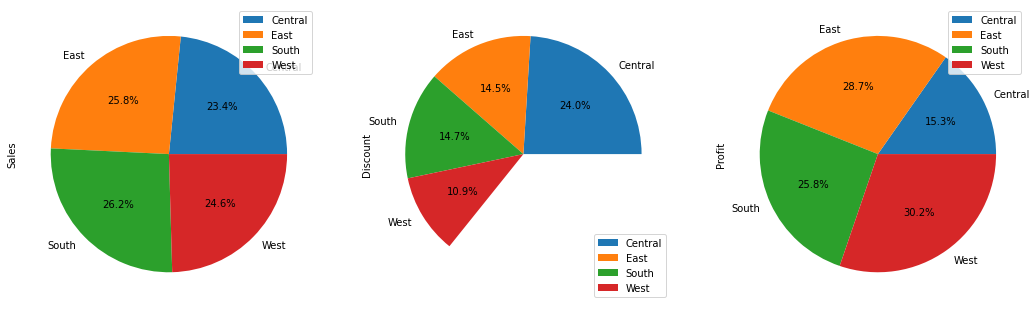

In [66]:
df_region.plot.pie(subplots=True, figsize=(18, 20), autopct='%1.1f%%',labels = df_region.index)